# Eigensystem Calculation and Plotting


### Credit: Emmanuel Flores

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rc('text', usetex=True)

In [202]:
# Parameters
N = 200  # Number of grid points
x_max = 20 # Maximum x value (adjust as needed)
x_min = -20
dx = (x_max-x_min)/N
x = np.linspace(x_min, x_max, N+1)

# Physical constants (can be set to 1 for simplicity)
hbar, omega = 1, 1
g = 1
m = 1
mu = 0.5
a = 0.1277528328333636

In [203]:
# Set figure parameters for all plots
newParams = {'figure.figsize'  : (12, 6),  # Figure size
             'figure.dpi'      : 200,      # figure resolution
             'axes.titlesize'  : 20,       # fontsize of title
             'axes.labelsize'  : 11,       # fontsize of axes labels
             'axes.linewidth'  : 2,        # width of the figure box lines
             'lines.linewidth' : 1,        # width of the plotted lines
             'savefig.dpi'     : 200,      # resolution of a figured saved using plt.savefig(filename)
             'ytick.labelsize' : 11,       # fontsize of tick labels on y axis
             'xtick.labelsize' : 11,       # fontsize of tick labels on x axis
             'legend.fontsize' : 12,       # fontsize of labels in legend
             'legend.frameon'  : True,     # activate frame on lengend
            }
plt.rcParams.update(newParams) # Set new plotting parameters

In [204]:
# Create potentials

# Simple harmonic oscillator
V_SHO=0.5*x**2*(omega**2)*m

#1D Yukawa
V_yuk = -g**2 / (2 * mu) * np.exp(-mu * np.abs(x))

# Infinite square well
V_inf_sq_well=np.zeros_like(x)
# Set Dirichlet Boundary Conditions
V_inf_sq_well[0] = 1e30
V_inf_sq_well[-1] = 1e30


In [205]:
def create_hamiltonian(V):
  # c = 1 ** 2 / (2 * m * dx ** 2)
  c = 1 ** 2 / ( m * dx ** 2)
  hamiltonian = np.zeros((N+1, N+1))
  for i in range(1, N - 1):
      hamiltonian[i, i] = 2 * c + V[i]
      hamiltonian[i, i + 1] = -c
      hamiltonian[i, i - 1] = -c
  # hamiltonian[0,0] = 1e30
  # hamiltonian[-1,-1] = 1e30
  return hamiltonian

In [206]:
def eigensystem_sorted(eigenvalues, eigenvectors):
  idx = eigenvalues.argsort()
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]
  return eigenvalues, eigenvectors

In [207]:
def plot_eigenfunction(eigenvalues, eigenvectors, n_eigenstates, title):
  
  fig=plt.figure()
  for i in range(0,n_eigenstates):
    if eigenvalues[i] < 0:
      plt.plot(x, eigenvectors[:, i], label=f'$E_{i}$ = {eigenvalues[i]:.3f}')
  plt.xlabel(f'$x$')
  plt.ylabel('$\psi(x)$')
  plt.title(title)
  plt.legend()
  plt.grid(True)

In [208]:
H=create_hamiltonian(V_yuk)

# Solve for eigenvalues and eigenvectors and sort
eigenvalues, eigenvectors = np.linalg.eig(H)
eig=eigensystem_sorted(eigenvalues, eigenvectors)

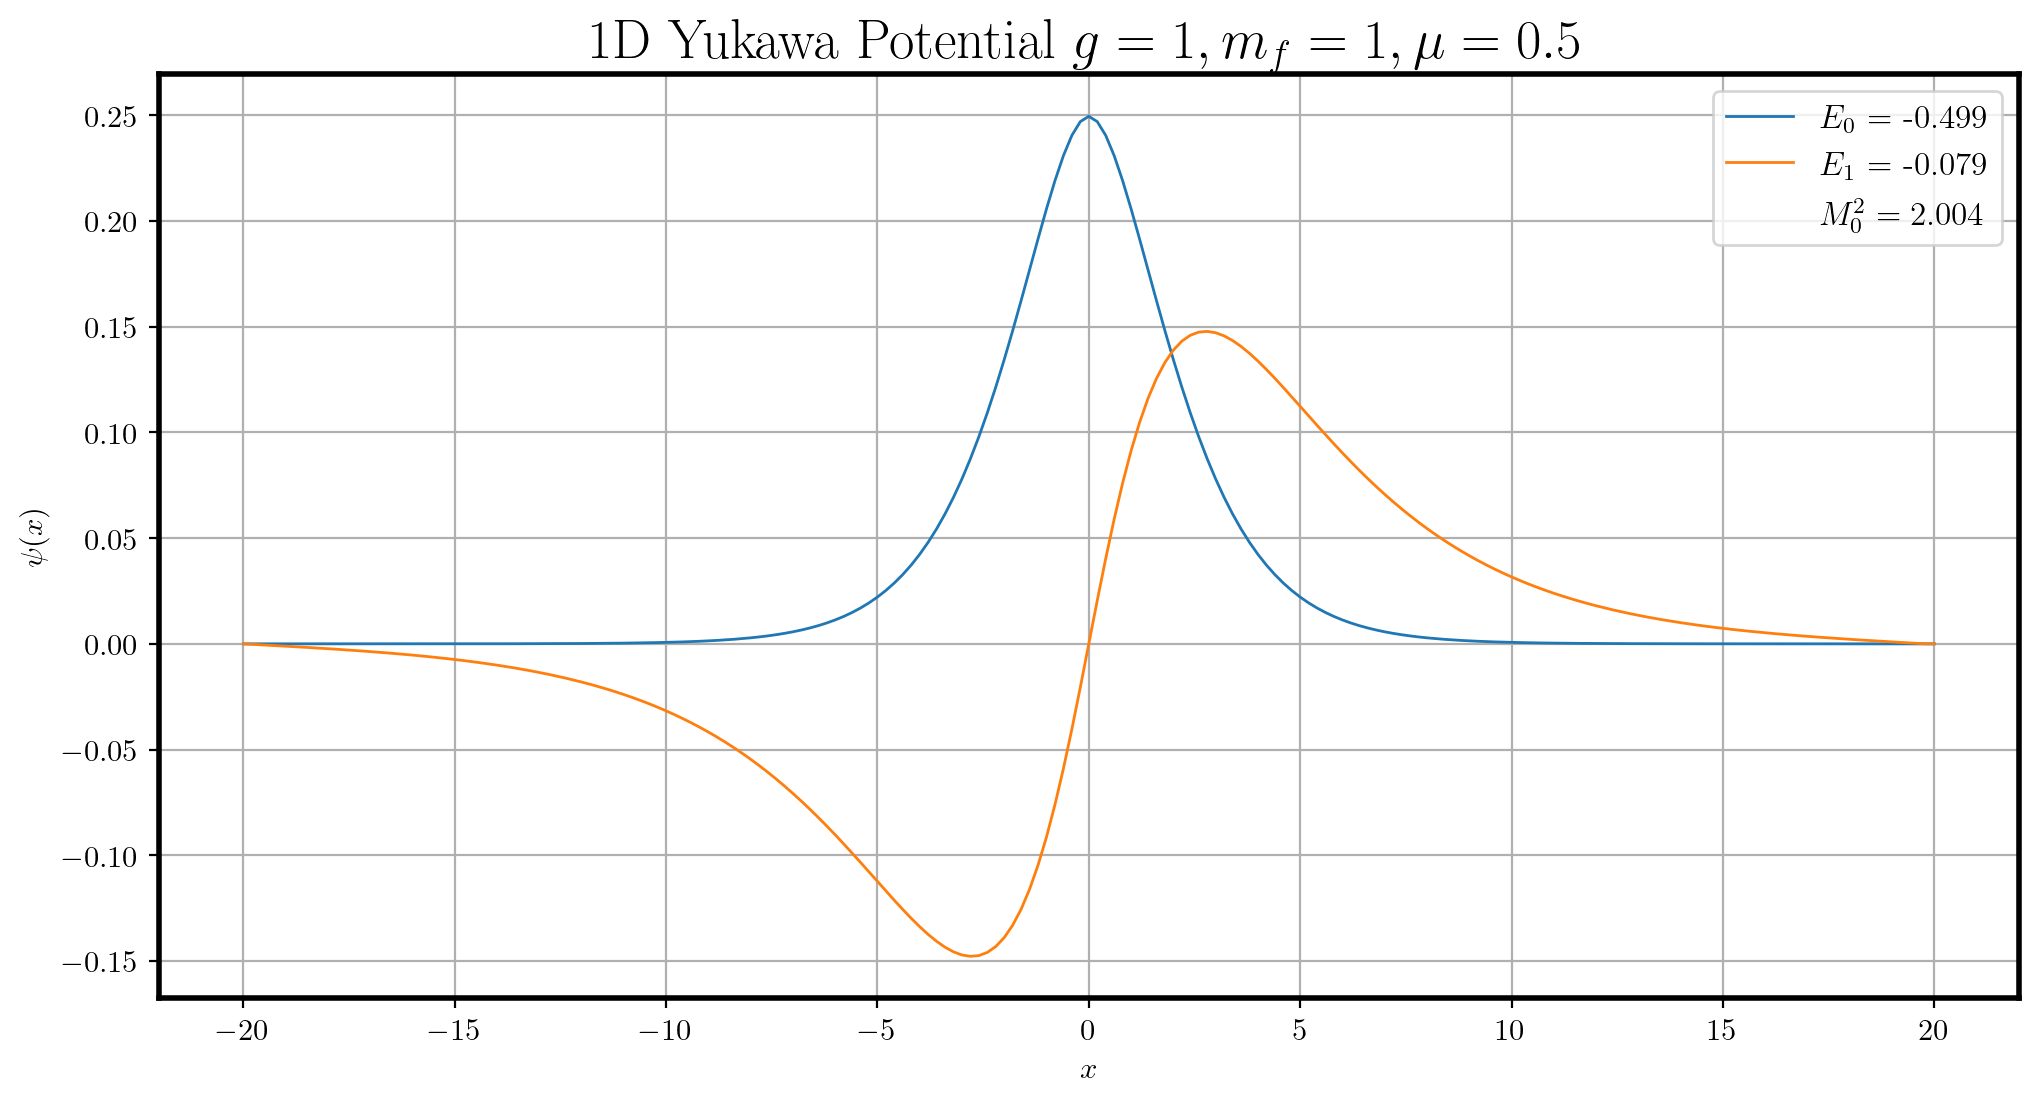

In [209]:
plot_eigenfunction(eig[0], eig[1], 100, f'1D Yukawa Potential $g = {g}, m_f = {m}, \mu = {mu}$')
plt.plot([], [], color = 'white', label = f'$M_0^2 = {(eig[0][0] * 2*2*m + (2*m)**2).round(3)}$')
# plt.plot(x, np.sqrt(np.sqrt(2 * a / np.pi)) * np.exp(-a * np.abs(x)**2))
plt.legend()
plt.show()

In [167]:
g = 0.3

bounds = []
mus = np.arange(0.05, 1, 0.005)
for mu in mus:
    V = -g**2 / (2 * mu) * np.exp(-mu * np.abs(x))
    H=create_hamiltonian(V)

    # Solve for eigenvalues and eigenvectors and sort
    eigenvalues, eigenvectors = np.linalg.eig(H)
    bounds.append(eigenvalues[eigenvalues < 0])

padded_eigenvalues = np.array(
    [
        np.pad(eig, (0, max(len(eig) for eig in bounds) - len(eig)), constant_values=np.nan)
        for eig in bounds
    ]
)

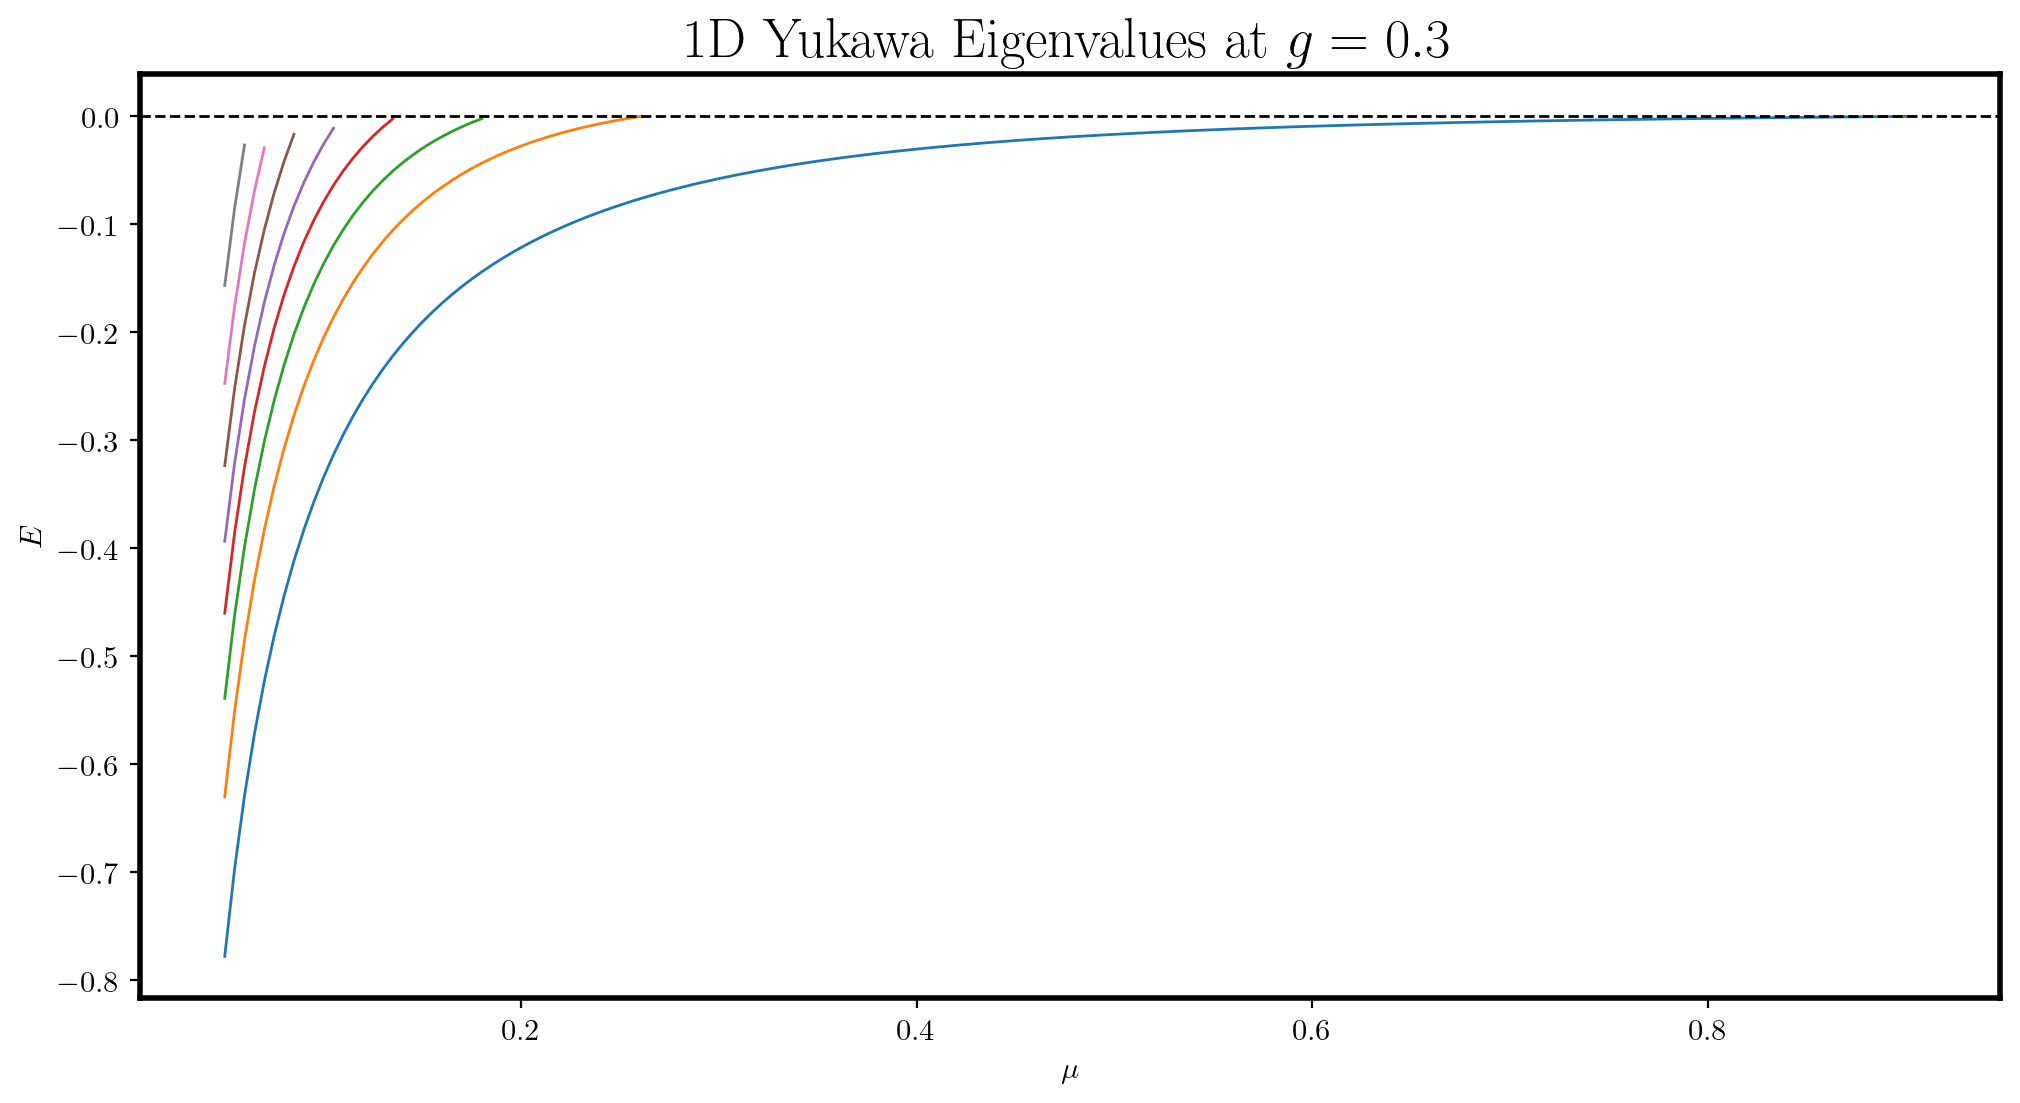

In [169]:
plt.plot(mus, padded_eigenvalues)
plt.ylabel(f"$E$")
plt.xlabel(f"$\mu$")
plt.title(f"1D Yukawa Eigenvalues at $g = {g}$")
plt.axhline(y = 0, linestyle = '--', color = 'k')
# plt.ylim(-1, 0.1)
plt.show()

# Plotting Analytical versus Computational Solution for Infinite Sq Well

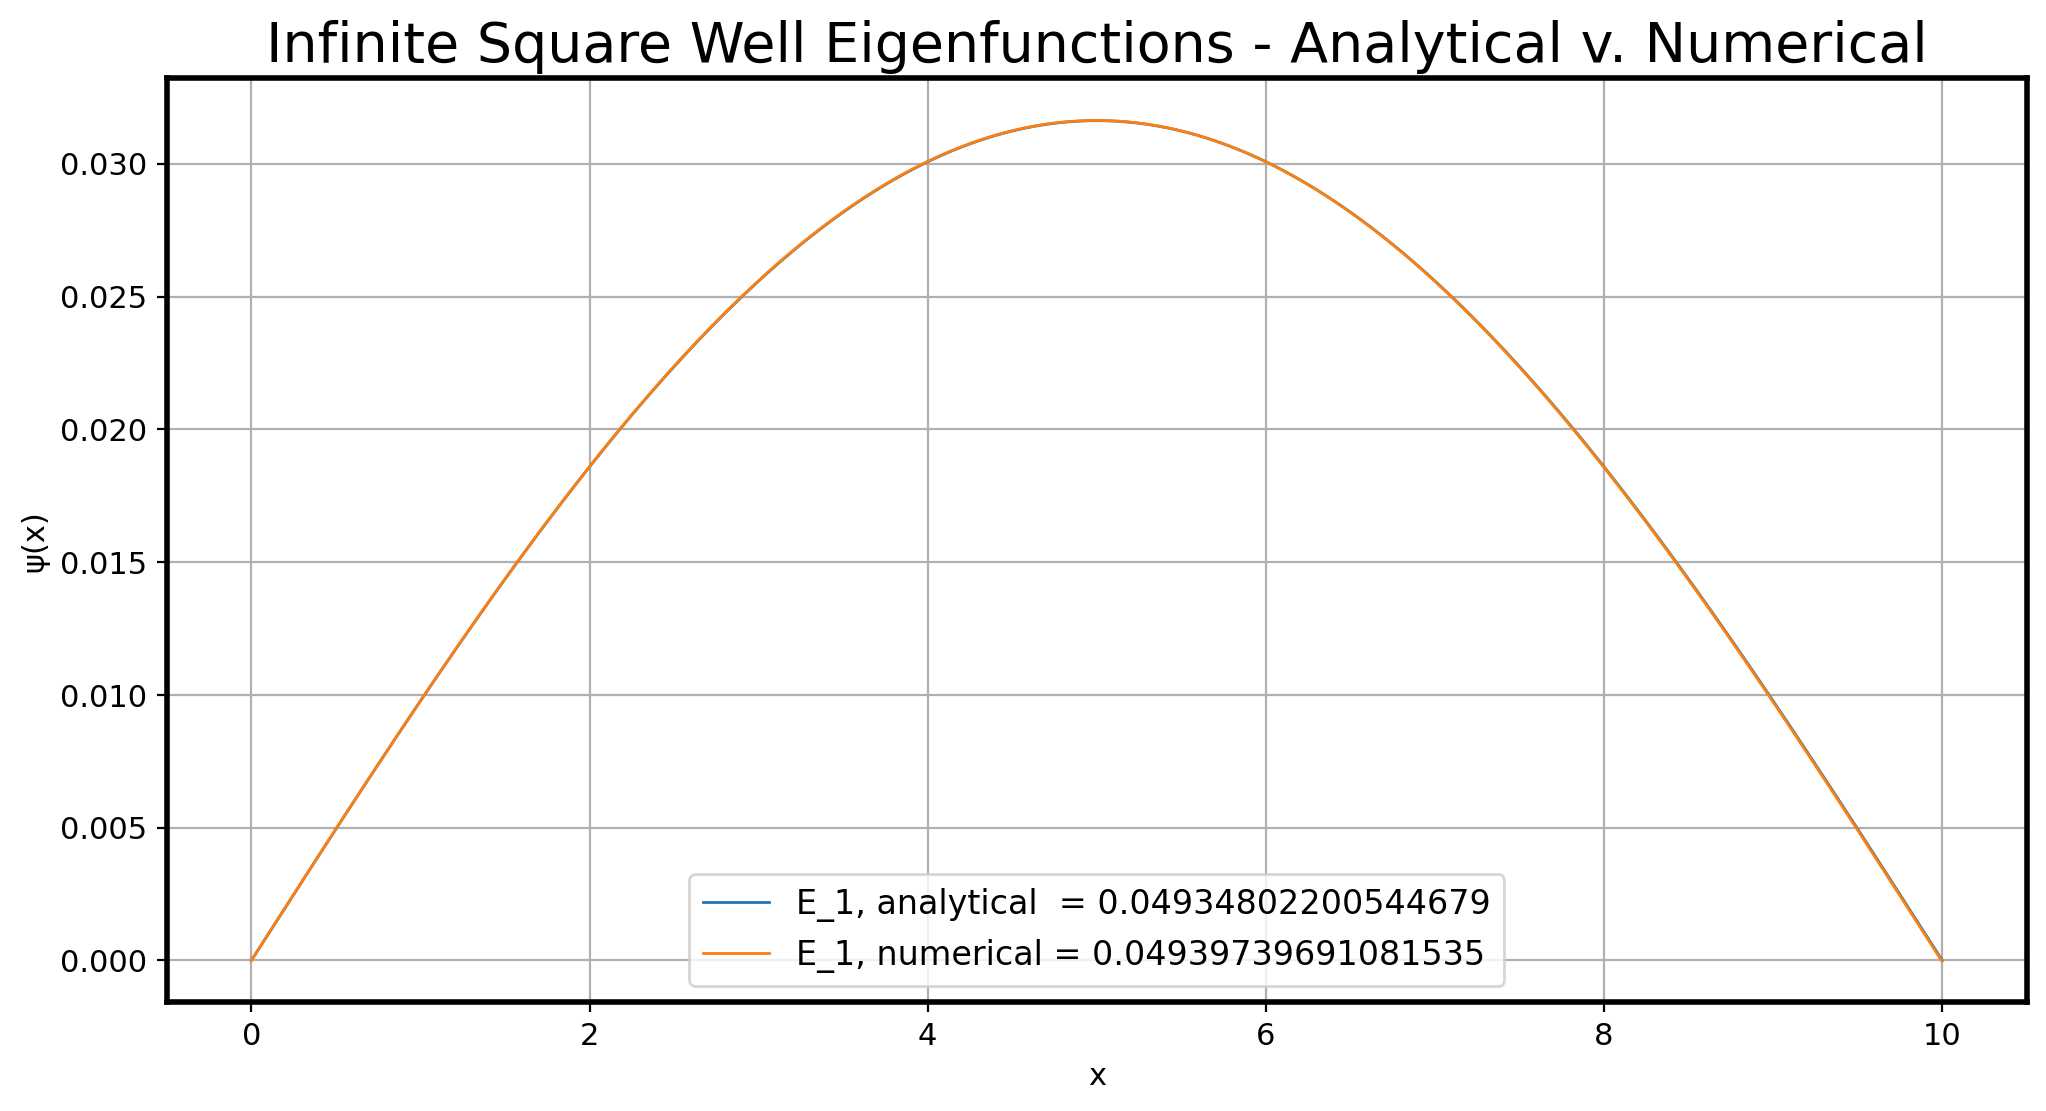

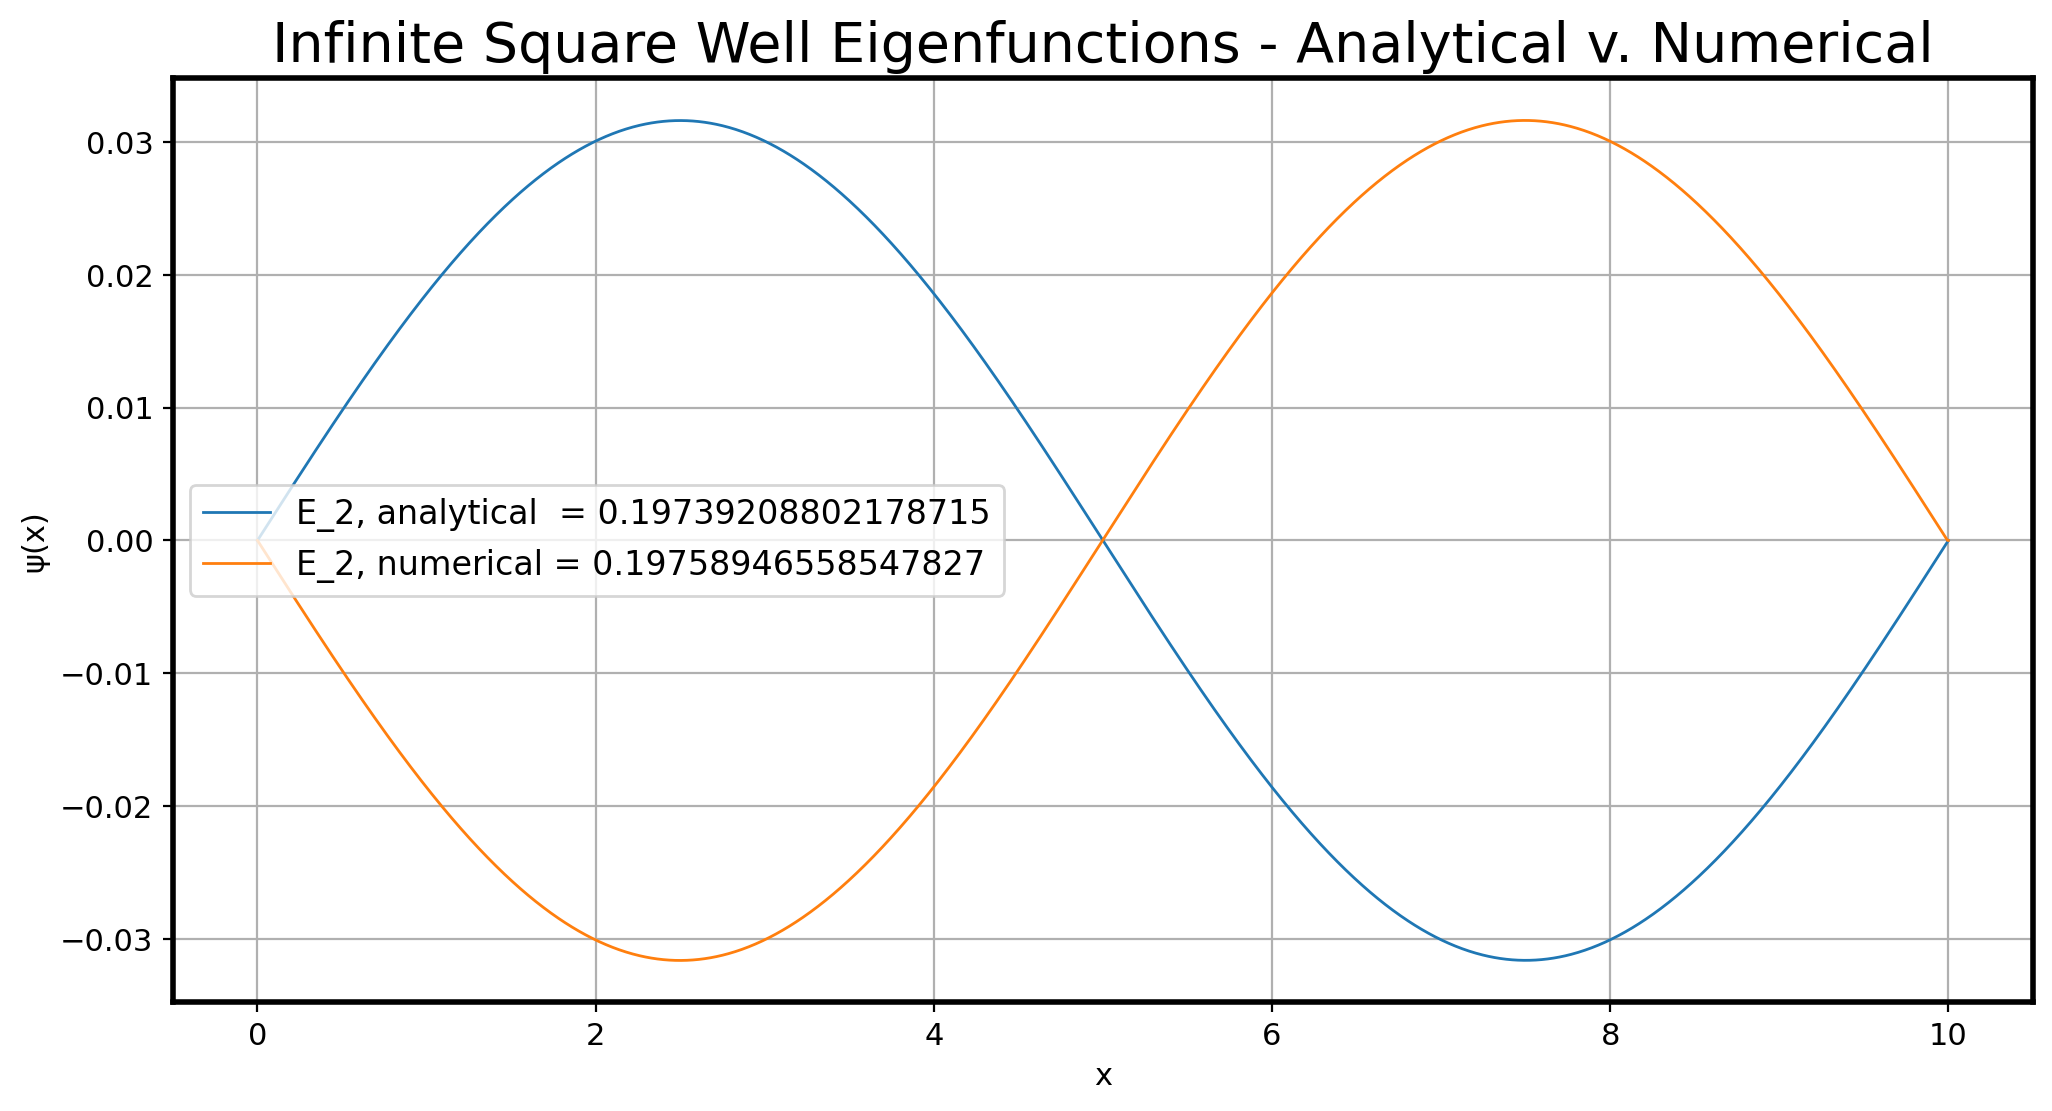

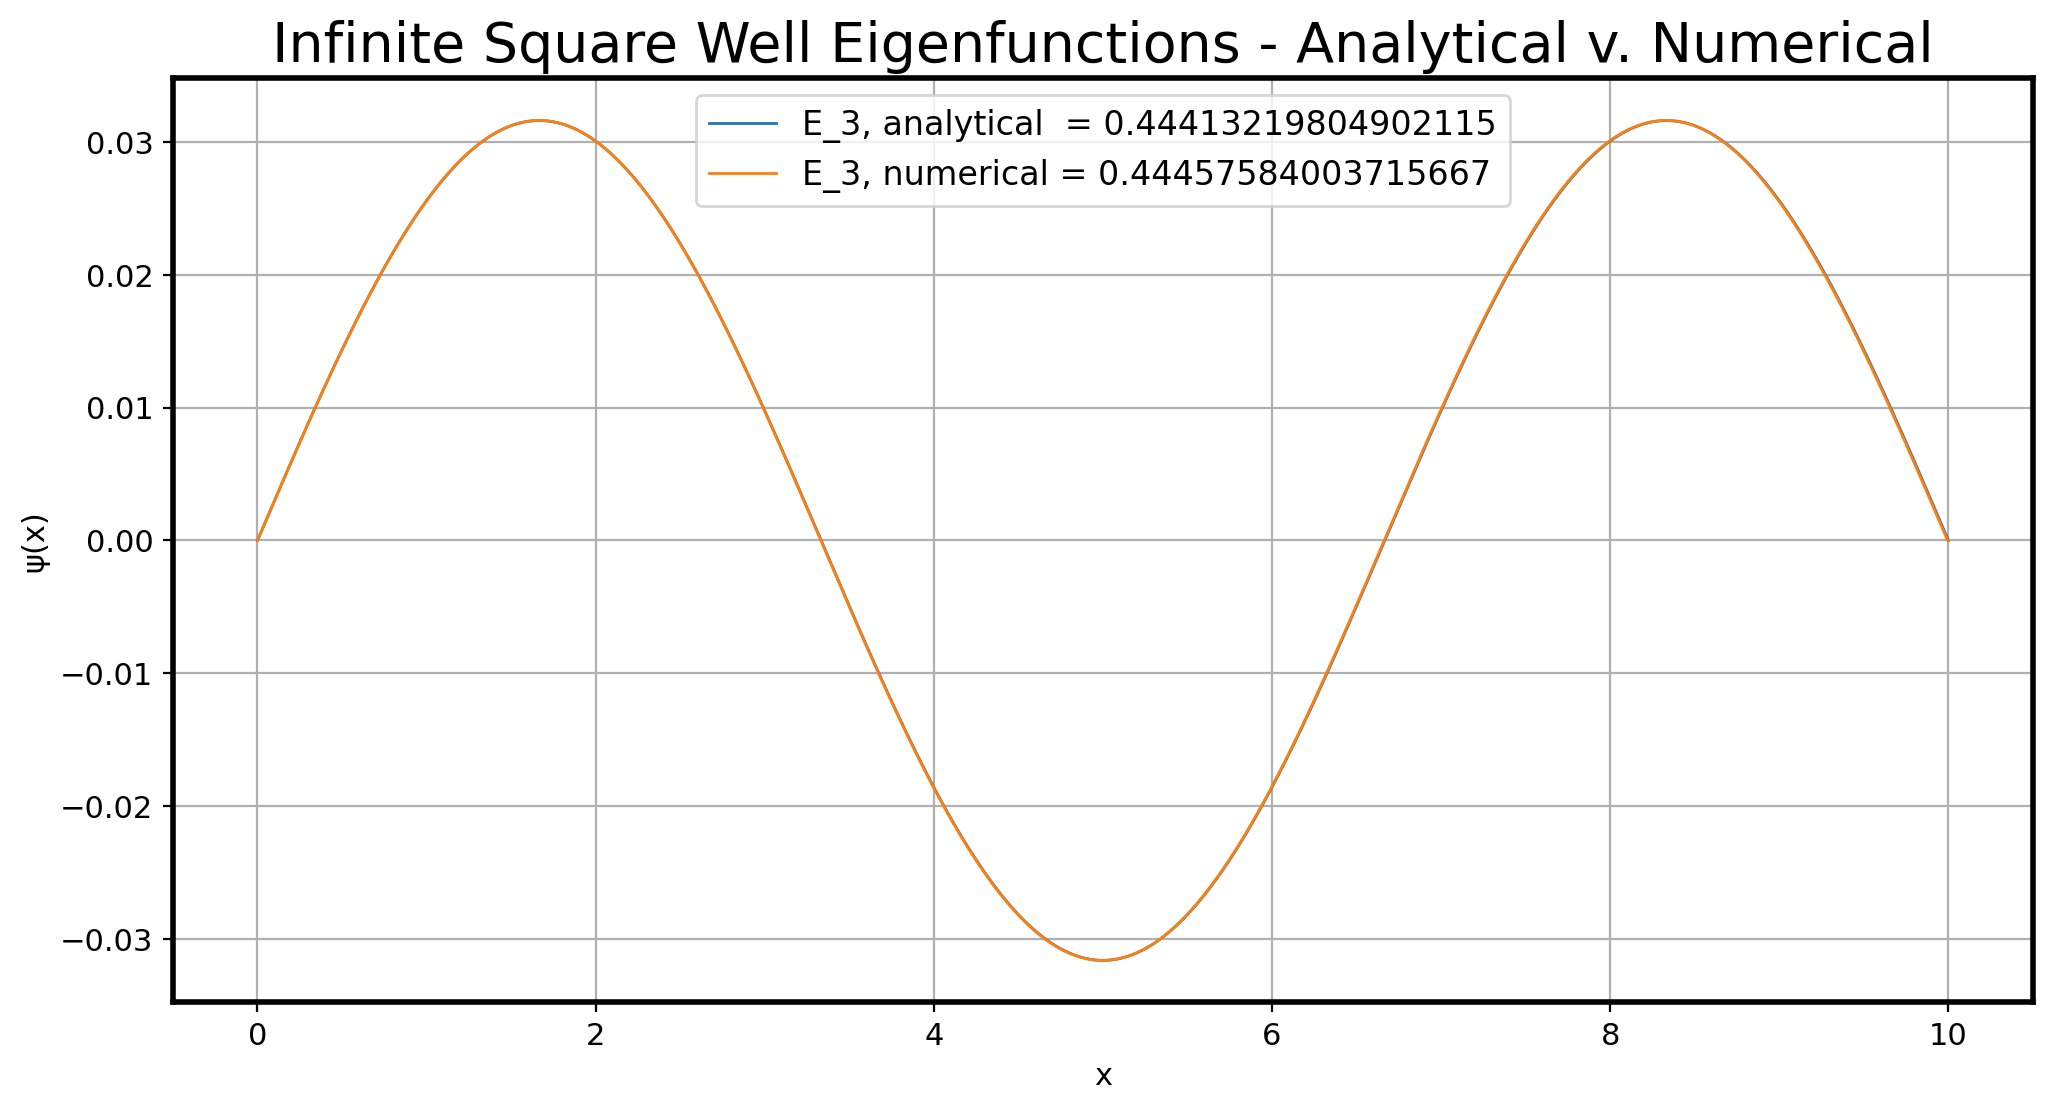

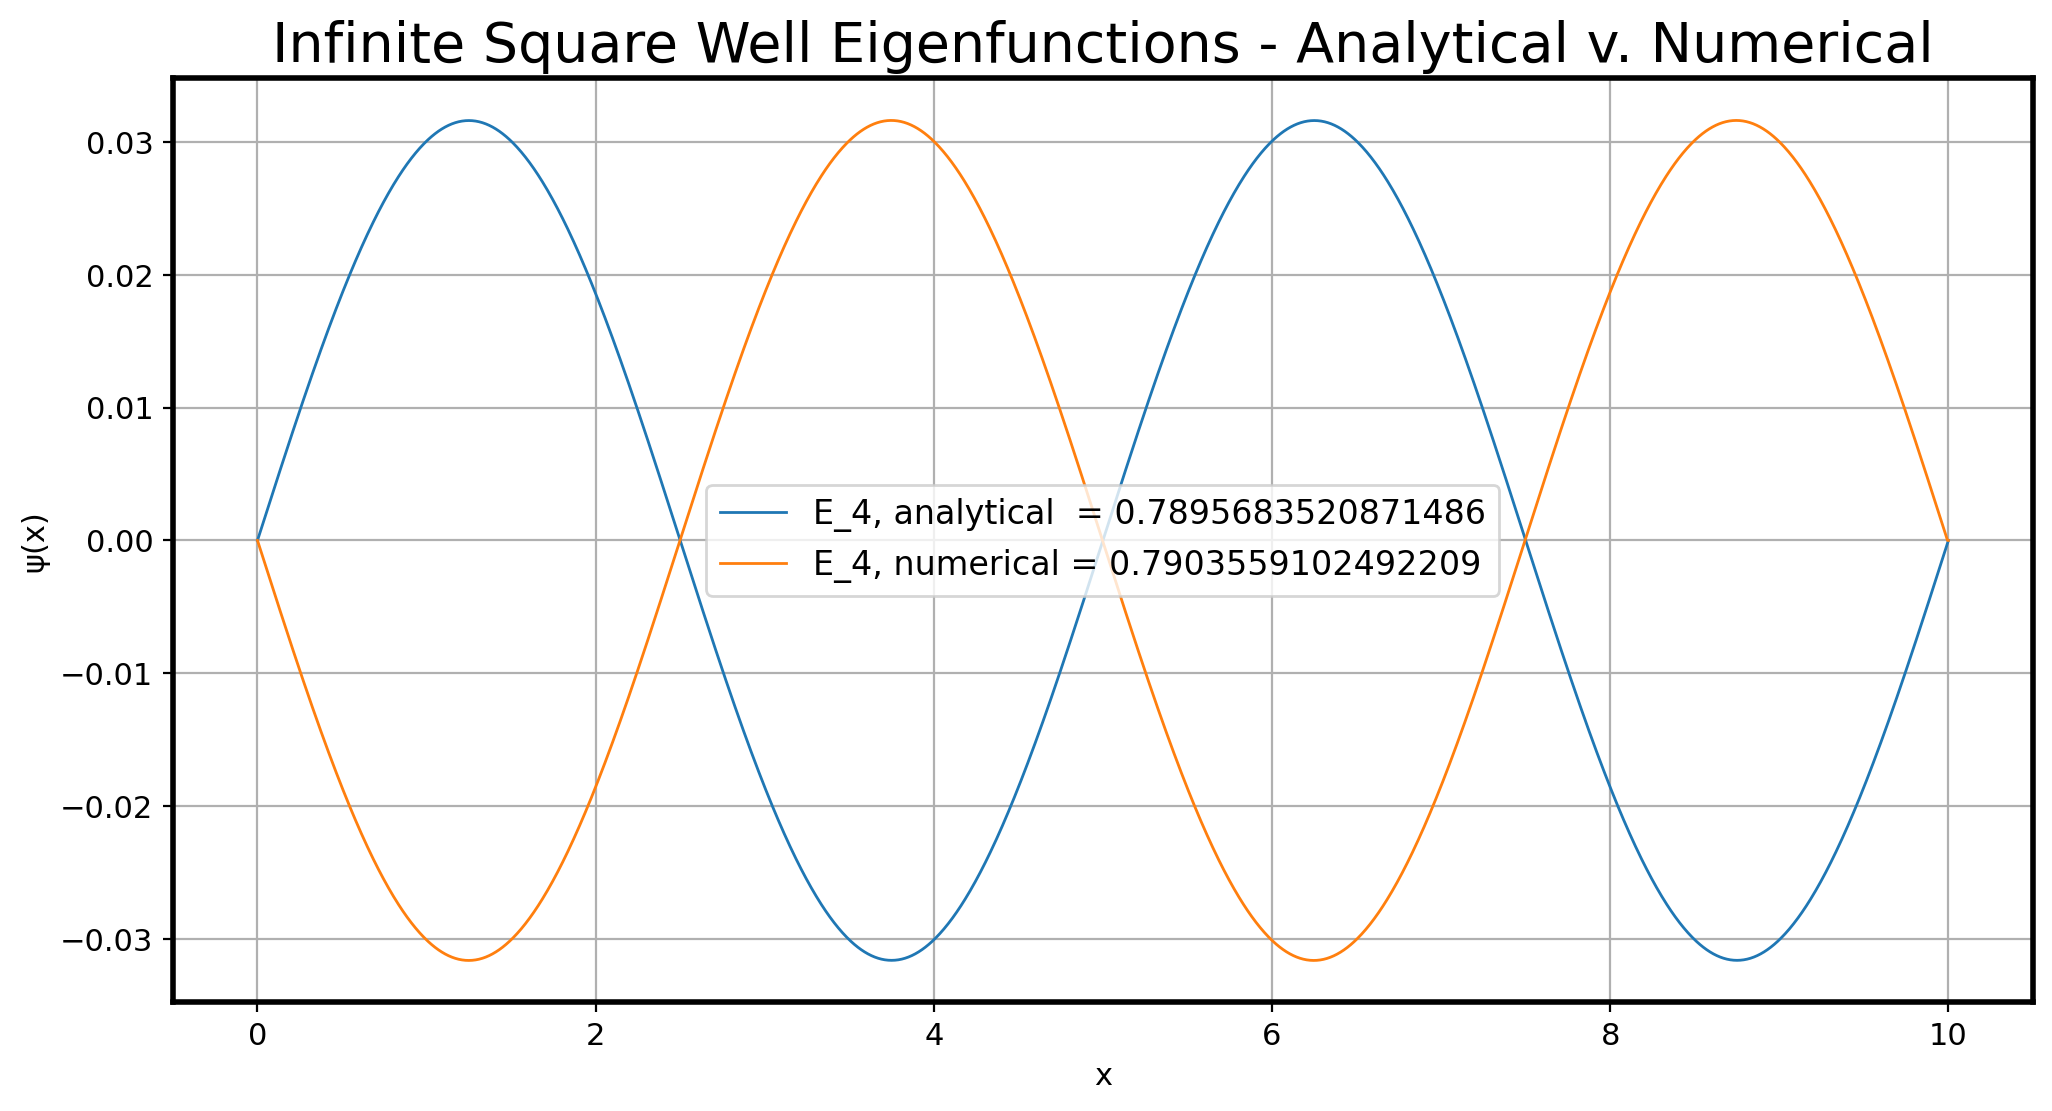

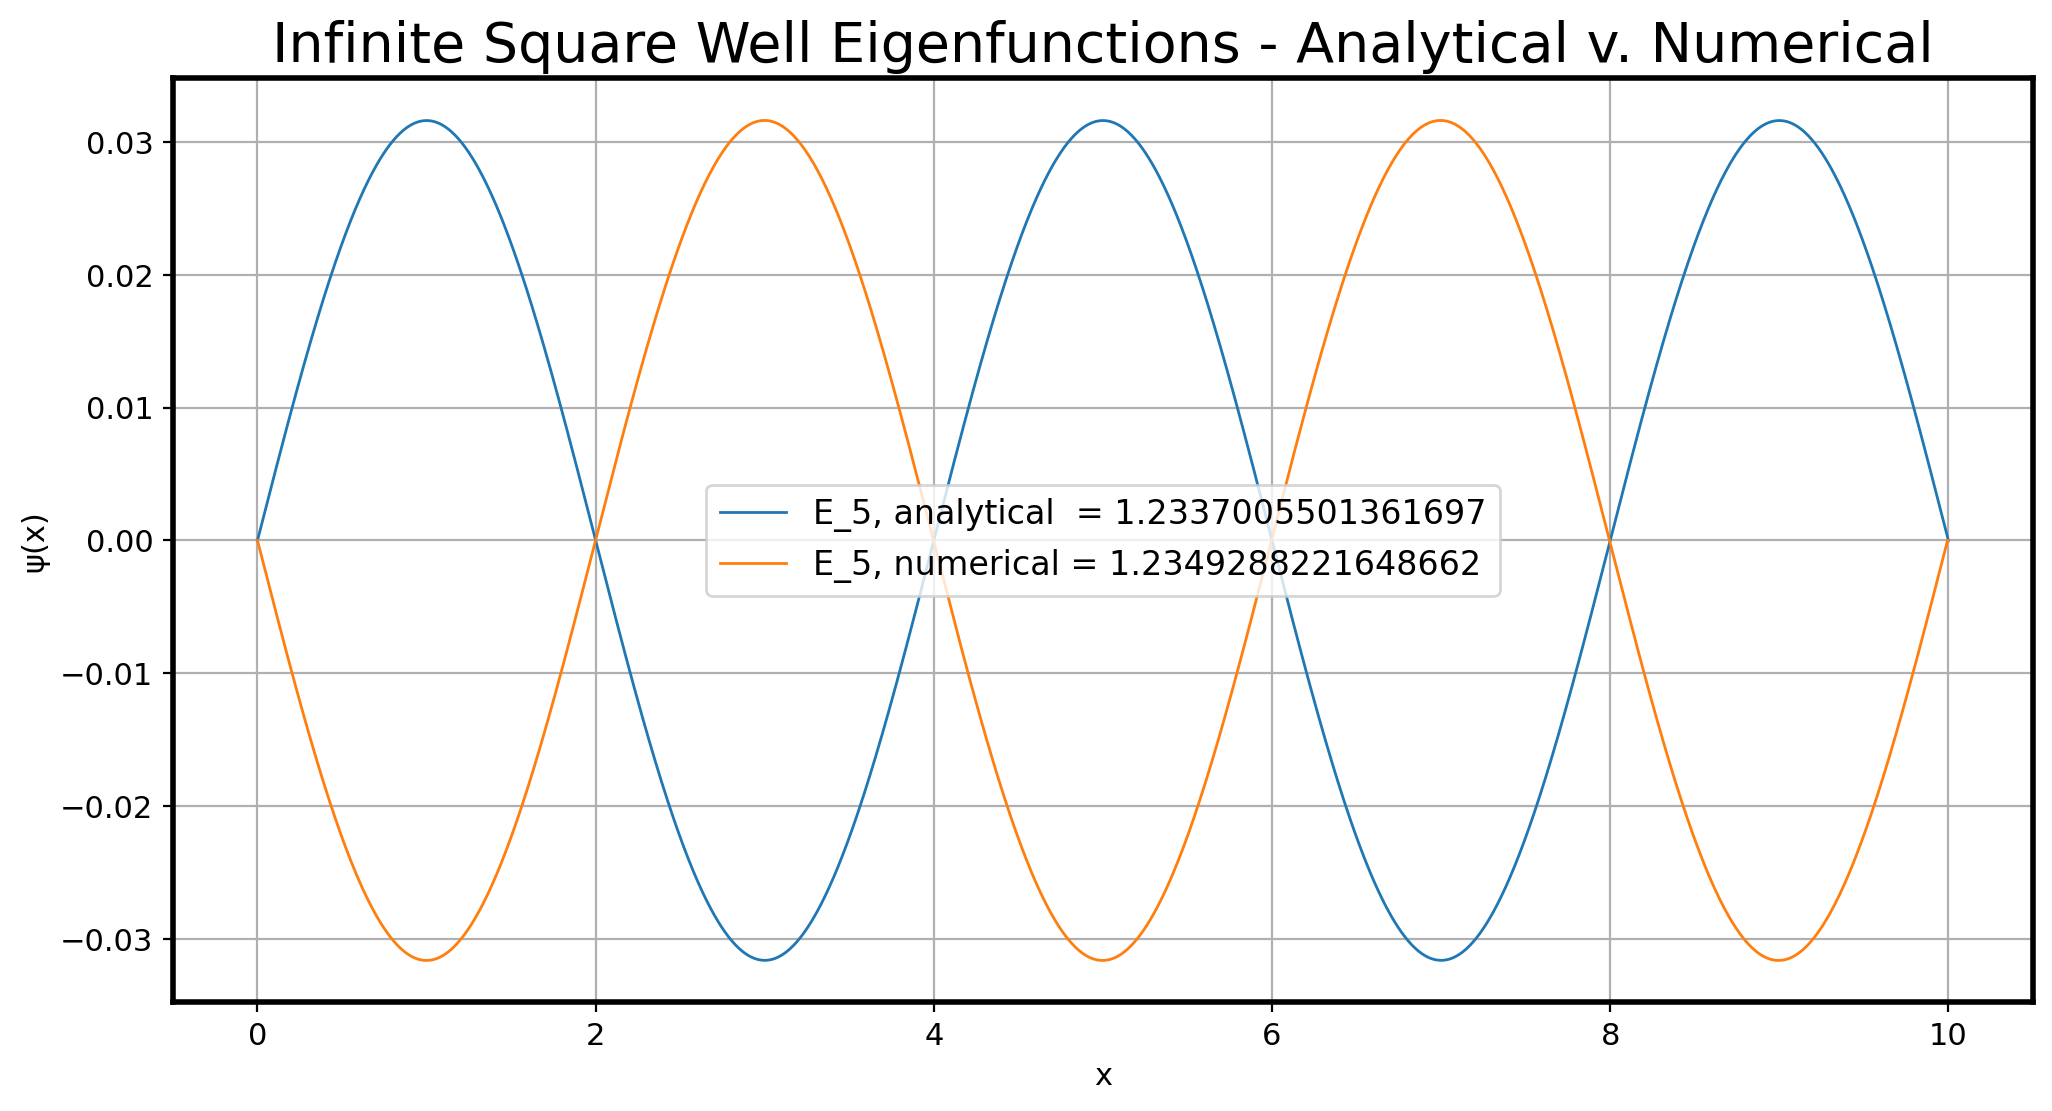

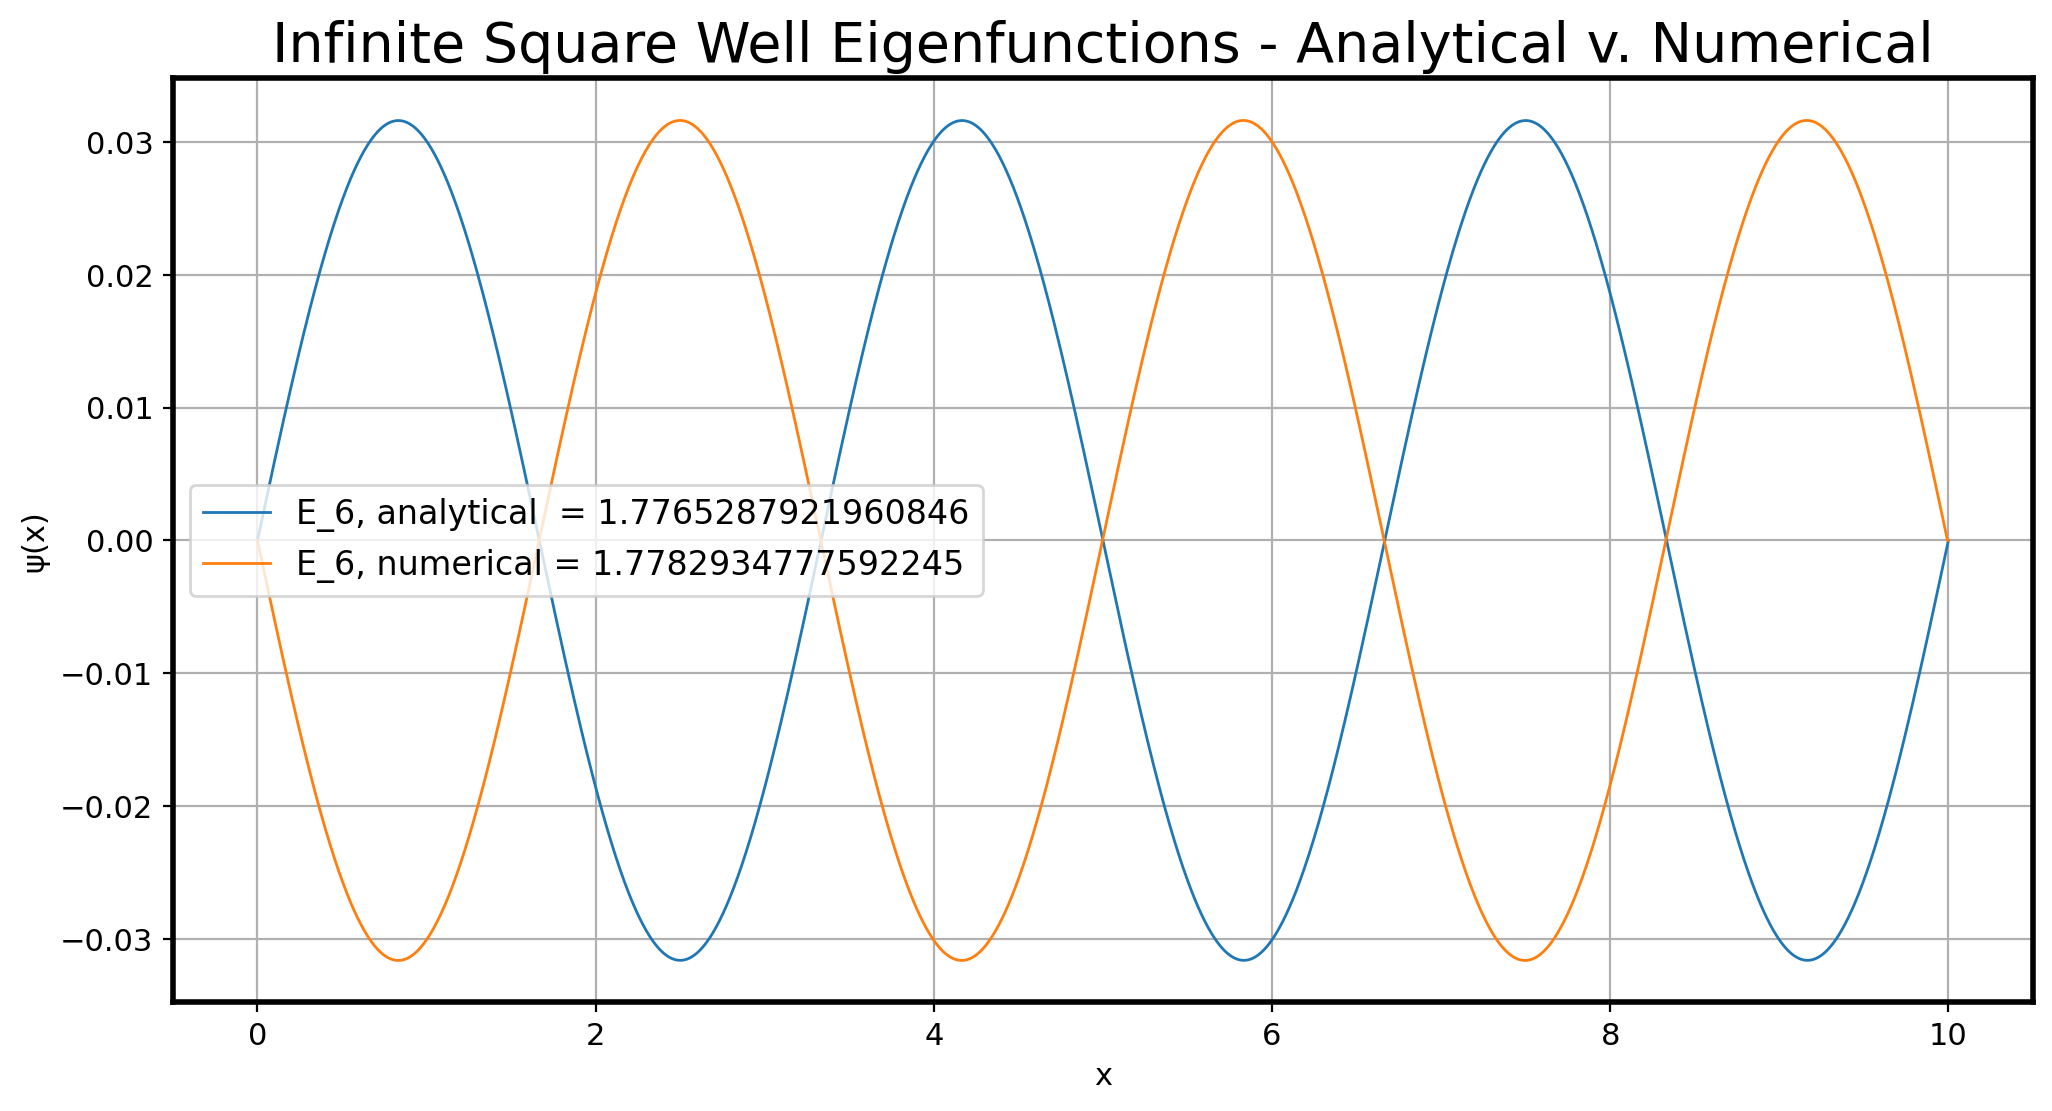

In [ ]:
maxenergy=7
L=x_max-x_min

# computational solution
H=create_hamiltonian(V_inf_sq_well)

# Solve for eigenvalues and eigenvectors and sort
eigenvalues, eigenvectors = np.linalg.eig(H)
comp_eig_val, comp_eig_state =eigensystem_sorted(eigenvalues, eigenvectors)
for j in range(len(comp_eig_state)):
  comp_eig_state[:,j]=comp_eig_state[:,j]/np.linalg.norm(comp_eig_state[:,j])

for i in range(1,maxenergy):

  plt.figure()

  # analytical solution
  ana_eig_state=(2/L)**.5*np.sin(i*np.pi*x/L)
  ana_eig_state=ana_eig_state/np.linalg.norm(ana_eig_state)
  ana_eig_val=(i**2)*(hbar**2)*(np.pi**2)/(2*m*(L**2))
  plt.plot(x, ana_eig_state, label=f'E_{i}, analytical  = {ana_eig_val}')
  plt.plot(x, comp_eig_state[:,i], label=f'E_{i}, numerical = {comp_eig_val[i]}')
  plt.xlabel('x')
  plt.ylabel('ψ(x)')
  plt.title('Infinite Square Well Eigenfunctions - Analytical v. Numerical')
  plt.legend()
  plt.grid(True)

#Calculate error between eigenvalues for analytical versus computational calculation

Text(0.5, 1.0, 'Eigenvalues for Analytical and Numerical Solutions')

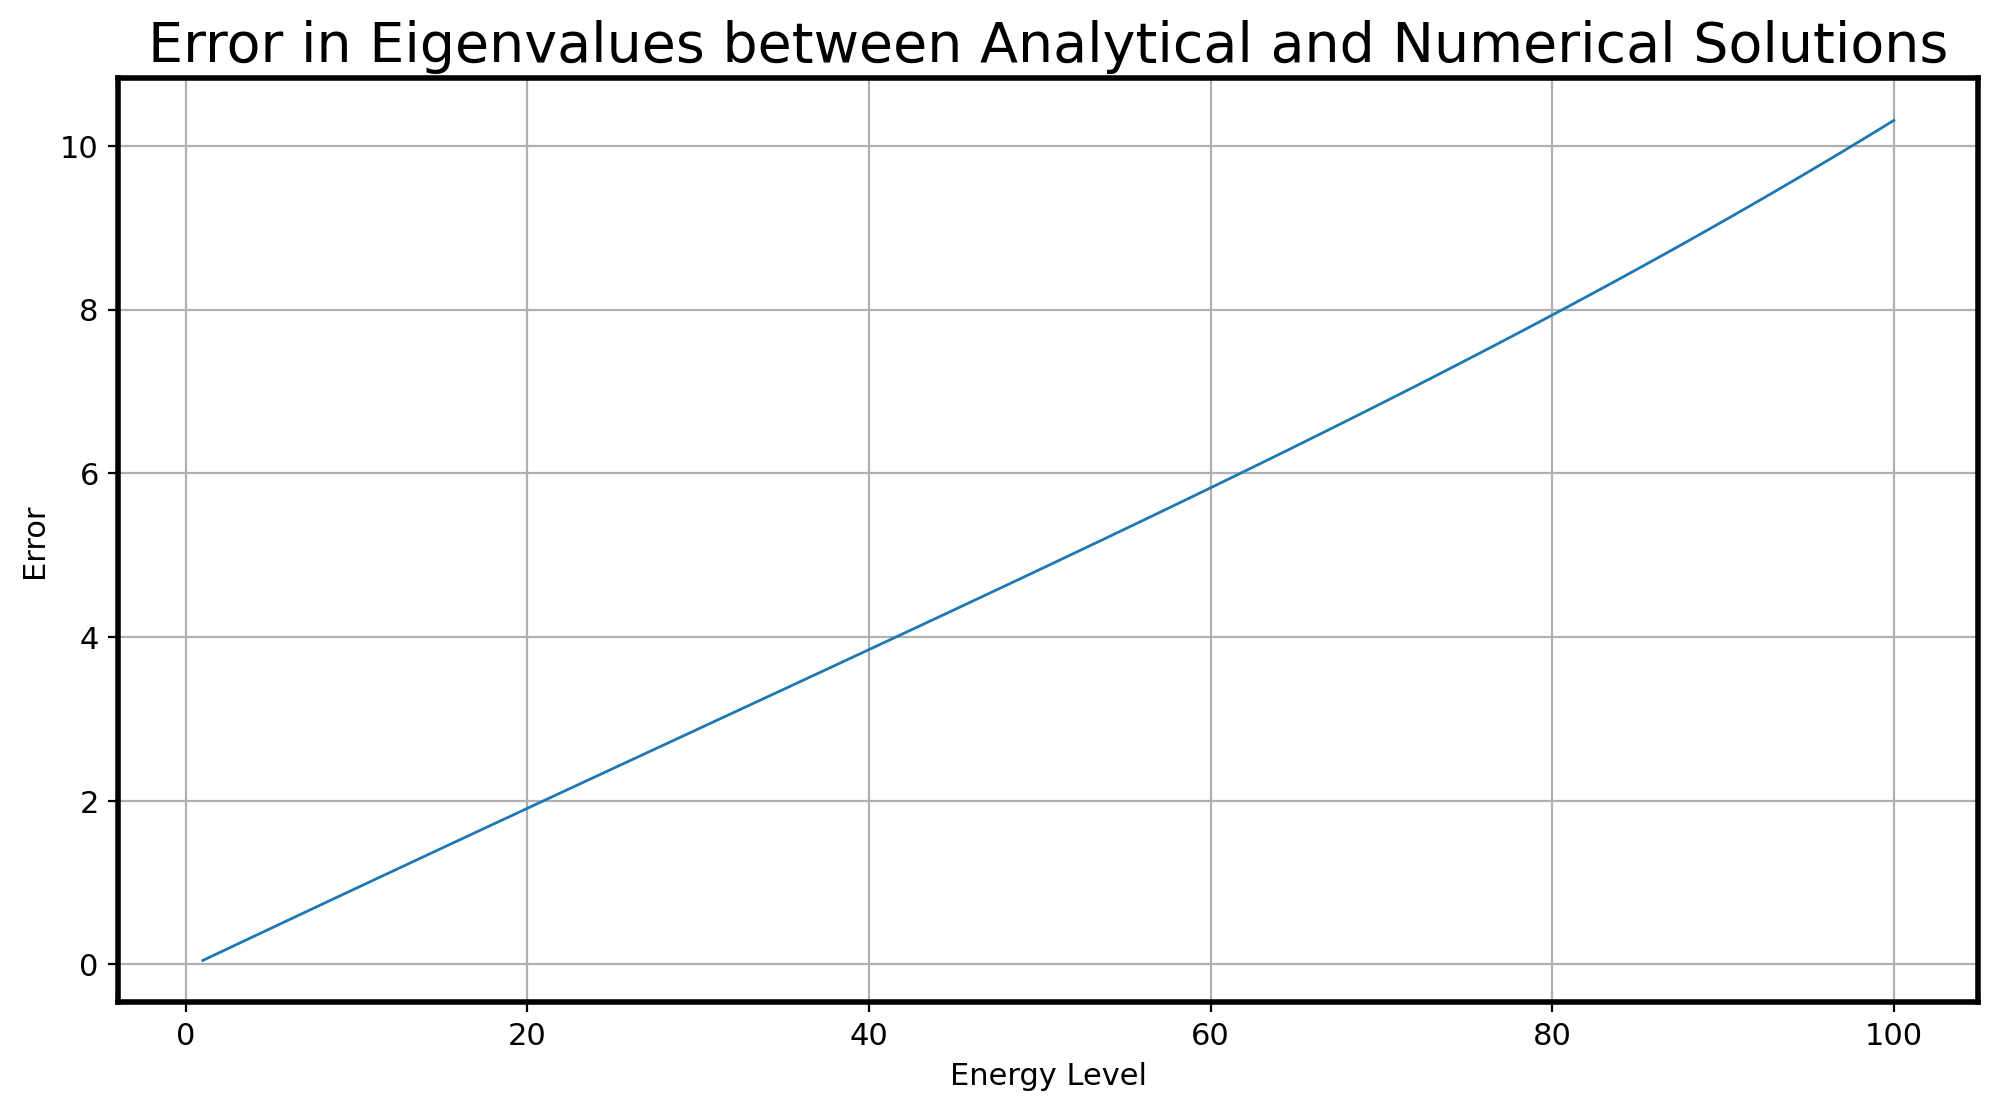

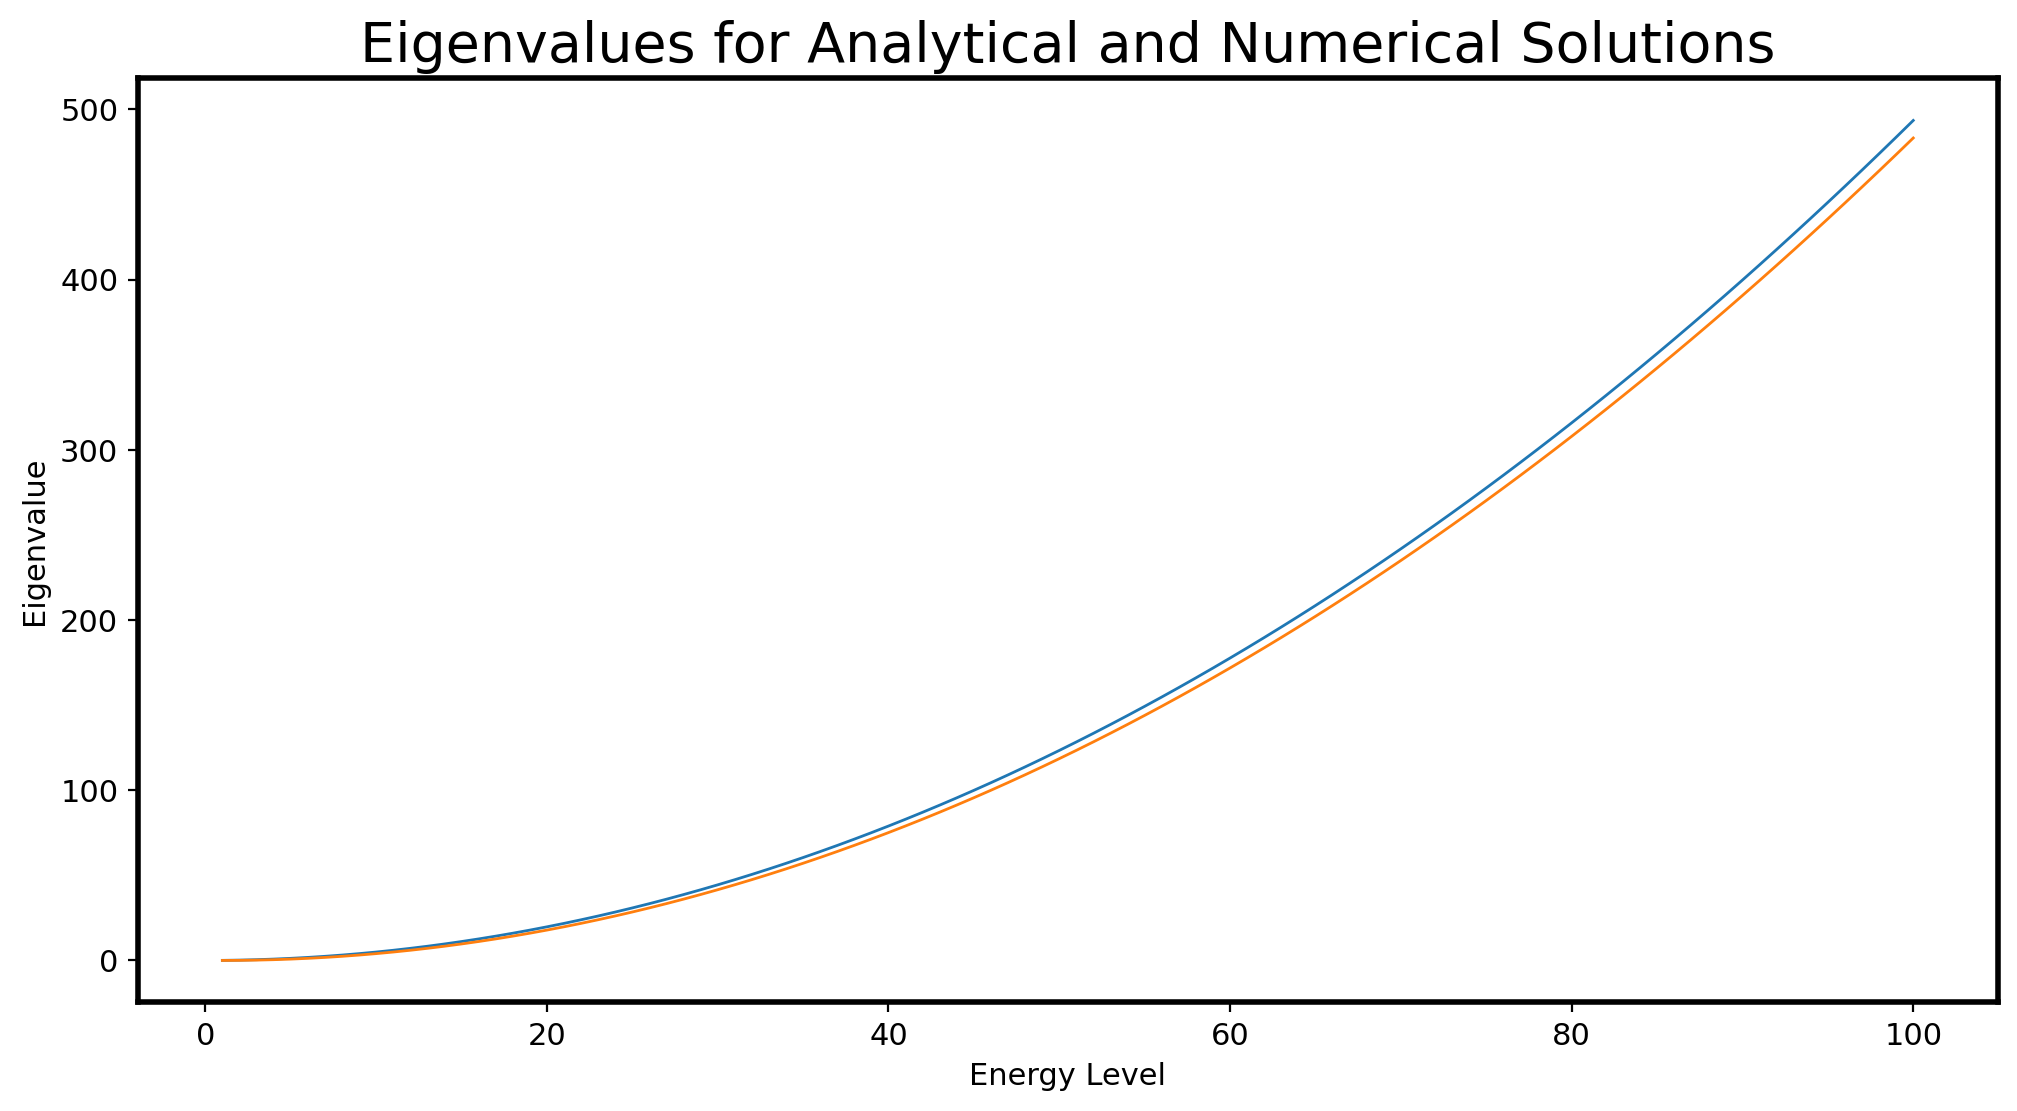

In [ ]:
# Define energy levels to test
max_n=100
n_array=np.arange(1,max_n+1)

ana_eig_val_array=[]

# Create array of eigenvalues for analytical solution
for i in range(1,max_n+1):
  ana_eig_val_array.append((i**2)*(hbar**2)*(np.pi**2)/(2*m*(L**2)))

# Plot the error between the analytical and computational eigenvalues
plt.figure()
plt.plot(n_array, ana_eig_val_array-comp_eig_val[0:max_n])
plt.xlabel("Energy Level")
plt.ylabel('Error')
plt.title('Error in Eigenvalues between Analytical and Numerical Solutions')
plt.grid(True)

# Plot the eigenvalues themselves
plt.figure()
plt.plot(n_array, ana_eig_val_array, label="ana")
plt.plot(n_array, comp_eig_val[0:max_n], label="comp")
plt.xlabel('Energy Level')
plt.ylabel('Eigenvalue')
plt.title("Eigenvalues for Analytical and Numerical Solutions")